In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

time: 436 µs (started: 2022-11-24 09:05:28 +09:00)


In [3]:
from sklearn.metrics import mean_squared_error

time: 38 ms (started: 2022-11-24 09:05:28 +09:00)


In [4]:
np.random.seed(32)

time: 251 µs (started: 2022-11-24 09:05:28 +09:00)


## user

In [8]:
user_column_names =  ['user_id', 'age', 'sex', 'occupation', 'zip_code']
user_df = pd.read_csv("ml-100k/u.user", sep='|', names=user_column_names)

time: 3.52 ms (started: 2022-11-24 09:05:32 +09:00)


In [9]:
user_df.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


time: 5.47 ms (started: 2022-11-24 09:05:32 +09:00)


In [10]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   sex         943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
time: 4.72 ms (started: 2022-11-24 09:05:32 +09:00)


In [11]:
user_df.drop(columns="zip_code", inplace=True)

time: 629 µs (started: 2022-11-24 09:05:32 +09:00)


In [12]:
user_df['age'] = pd.cut(user_df['age'], [0, 10, 20, 30, 40, 50, 100], labels=['1', '2', '3', '4', '5', '6'])

time: 1.48 ms (started: 2022-11-24 09:05:32 +09:00)


In [13]:
user_df = pd.get_dummies(user_df)

time: 2.92 ms (started: 2022-11-24 09:05:32 +09:00)


In [14]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   user_id                   943 non-null    int64
 1   age_1                     943 non-null    uint8
 2   age_2                     943 non-null    uint8
 3   age_3                     943 non-null    uint8
 4   age_4                     943 non-null    uint8
 5   age_5                     943 non-null    uint8
 6   age_6                     943 non-null    uint8
 7   sex_F                     943 non-null    uint8
 8   sex_M                     943 non-null    uint8
 9   occupation_administrator  943 non-null    uint8
 10  occupation_artist         943 non-null    uint8
 11  occupation_doctor         943 non-null    uint8
 12  occupation_educator       943 non-null    uint8
 13  occupation_engineer       943 non-null    uint8
 14  occupation_entertainment  943 non-null    

In [15]:
user_df.head()

,user_id,age_1,age_2,age_3,age_4,age_5,age_6,sex_F,sex_M,occupation_administrator,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
0,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,4,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,5,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


time: 58.1 ms (started: 2022-11-24 09:05:32 +09:00)


time: 60.3 ms (started: 2022-11-24 09:05:32 +09:00)


## item

In [16]:
item_column_names = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

item_df = pd.read_csv('ml-100k/u.item', sep='|', names=item_column_names, encoding='latin-1')


time: 5.06 ms (started: 2022-11-24 09:05:32 +09:00)


In [17]:
item_df.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


time: 7.56 ms (started: 2022-11-24 09:05:32 +09:00)


In [18]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie id            1682 non-null   int64  
 1   movie title         1682 non-null   object 
 2   release date        1681 non-null   object 
 3   video release date  0 non-null      float64
 4   IMDb URL            1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

In [19]:
item_df['year'] = pd.DatetimeIndex(pd.to_datetime(item_df['release date'])).year

time: 13.6 ms (started: 2022-11-24 09:05:32 +09:00)


In [20]:
item_df[item_df['year'].isnull()]

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
266,267,unknown,NaN,NaN,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


time: 7.36 ms (started: 2022-11-24 09:05:32 +09:00)


rating_df에서 movie_id 267을 찾아보니 10개 정도 있다. 그냥 drop하면 안된다. 
최소 값으로 채워 넣자.

In [21]:
item_df.loc[item_df['year'].isnull(), 'year'] = item_df['year'].min()

time: 628 µs (started: 2022-11-24 09:05:32 +09:00)


In [22]:
print(item_df.loc[266])

movie id                  267
movie title           unknown
release date              NaN
video release date        NaN
IMDb URL                  NaN
unknown                     1
Action                      0
Adventure                   0
Animation                   0
Children's                  0
Comedy                      0
Crime                       0
Documentary                 0
Drama                       0
Fantasy                     0
Film-Noir                   0
Horror                      0
Musical                     0
Mystery                     0
Romance                     0
Sci-Fi                      0
Thriller                    0
War                         0
Western                     0
year                   1922.0
Name: 266, dtype: object
time: 716 µs (started: 2022-11-24 09:05:32 +09:00)


In [23]:
item_df.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1995.0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995.0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0


time: 8.52 ms (started: 2022-11-24 09:05:32 +09:00)


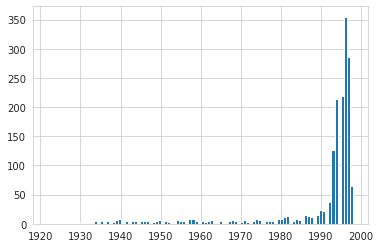

time: 188 ms (started: 2022-11-24 09:05:32 +09:00)


In [24]:
plt.hist(item_df['year'], bins=100)
plt.show()

In [25]:
MIN_YEAR = 1970

time: 192 µs (started: 2022-11-24 09:05:32 +09:00)


In [26]:
item_df.loc[item_df['year']<MIN_YEAR, 'year'] = MIN_YEAR

time: 1.4 ms (started: 2022-11-24 09:05:32 +09:00)


In [27]:
item_df['year'].value_counts()

1996.0    355
1997.0    286
1995.0    219
1994.0    214
1970.0    177
1993.0    126
1998.0     65
1992.0     37
1990.0     24
1991.0     22
1989.0     15
1986.0     15
1987.0     13
1982.0     13
1981.0     12
1988.0     11
1979.0      9
1974.0      8
1980.0      8
1984.0      8
1971.0      7
1985.0      7
1975.0      6
1983.0      5
1976.0      5
1973.0      4
1977.0      4
1978.0      4
1972.0      3
Name: year, dtype: int64

time: 2.38 ms (started: 2022-11-24 09:05:32 +09:00)


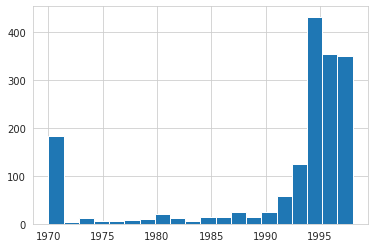

time: 93 ms (started: 2022-11-24 09:05:32 +09:00)


In [28]:
plt.hist(item_df['year'], bins=20)
plt.show()

In [29]:
item_df.drop(columns=['movie title', 'release date', 'video release date', 'IMDb URL'], inplace=True)
item_df.head()

,movie id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995.0
1,2,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
3,4,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1995.0
4,5,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1995.0


time: 7.62 ms (started: 2022-11-24 09:05:32 +09:00)


In [30]:
for column in ["year"]:
    MIN = item_df[column].min()
    MAX = item_df[column].max()
    print(f"MIN={MIN}, MAX={MAX}")
    item_df[column] = (item_df[column] - MIN) / (MAX - MIN)
item_df.head()

MIN=1970.0, MAX=1998.0


,movie id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.892857
1,2,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.892857
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0.892857
3,4,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0.892857
4,5,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0.892857


time: 7.9 ms (started: 2022-11-24 09:05:32 +09:00)


In [31]:
item_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movie id     1682 non-null   int64  
 1   unknown      1682 non-null   int64  
 2   Action       1682 non-null   int64  
 3   Adventure    1682 non-null   int64  
 4   Animation    1682 non-null   int64  
 5   Children's   1682 non-null   int64  
 6   Comedy       1682 non-null   int64  
 7   Crime        1682 non-null   int64  
 8   Documentary  1682 non-null   int64  
 9   Drama        1682 non-null   int64  
 10  Fantasy      1682 non-null   int64  
 11  Film-Noir    1682 non-null   int64  
 12  Horror       1682 non-null   int64  
 13  Musical      1682 non-null   int64  
 14  Mystery      1682 non-null   int64  
 15  Romance      1682 non-null   int64  
 16  Sci-Fi       1682 non-null   int64  
 17  Thriller     1682 non-null   int64  
 18  War          1682 non-null   int64  
 19  Wester

time: 7.1 ms (started: 2022-11-24 09:05:32 +09:00)


## rating

In [32]:
rating_column_names = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

rating_base_df = pd.read_csv('ml-100k/ua.base', sep='\t', names=rating_column_names, encoding='latin-1')
rating_test_df = pd.read_csv('ml-100k/ua.test', sep='\t', names=rating_column_names, encoding='latin-1')


time: 24.7 ms (started: 2022-11-24 09:05:32 +09:00)


In [33]:
rating_base_df.head()

,user_id,movie_id,rating,unix_timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


time: 3.56 ms (started: 2022-11-24 09:05:32 +09:00)


In [34]:
rating_test_df.head()

,user_id,movie_id,rating,unix_timestamp
0,1,20,4,887431883
1,1,33,4,878542699
2,1,61,4,878542420
3,1,117,3,874965739
4,1,155,2,878542201


time: 2.48 ms (started: 2022-11-24 09:05:32 +09:00)


In [35]:
rating_df = rating_base_df.append(rating_test_df)

time: 2.09 ms (started: 2022-11-24 09:05:32 +09:00)


/tmp/ipykernel_16386/4230367298.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rating_df = rating_base_df.append(rating_test_df)


In [36]:
rating_df.head()

,user_id,movie_id,rating,unix_timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


time: 4.15 ms (started: 2022-11-24 09:05:32 +09:00)


time: 6.85 ms (started: 2022-11-24 09:05:32 +09:00)


In [37]:
rating_df[rating_df['movie_id']==267]

,user_id,movie_id,rating,unix_timestamp
256,1,267,4,875692955
445,5,267,4,875635064
12227,130,267,5,875801239
23647,268,267,3,875742077
27988,297,267,3,875409139
43231,422,267,4,875655986
54139,532,267,3,875441348
79838,833,267,1,875655669
3180,319,267,4,875707690


time: 4.76 ms (started: 2022-11-24 09:05:32 +09:00)


time: 7.2 ms (started: 2022-11-24 09:05:32 +09:00)


time: 9.26 ms (started: 2022-11-24 09:05:32 +09:00)


In [38]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 9429
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   user_id         100000 non-null  int64
 1   movie_id        100000 non-null  int64
 2   rating          100000 non-null  int64
 3   unix_timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.8 MB
time: 3.96 ms (started: 2022-11-24 09:05:32 +09:00)


In [39]:
rating_df.head()

,user_id,movie_id,rating,unix_timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,3,4,878542960
3,1,4,3,876893119
4,1,5,3,889751712


time: 2.32 ms (started: 2022-11-24 09:05:32 +09:00)


In [40]:
rating_df.drop(columns="unix_timestamp", inplace=True)
rating_df.head()

,user_id,movie_id,rating
0,1,1,5
1,1,2,3
2,1,3,4
3,1,4,3
4,1,5,3


time: 3.95 ms (started: 2022-11-24 09:05:32 +09:00)


rating


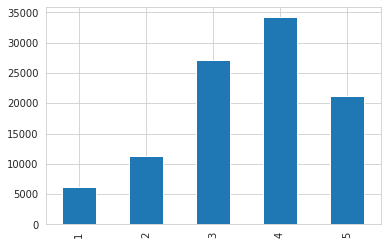

time: 77.7 ms (started: 2022-11-24 09:05:32 +09:00)


In [41]:
for column in ["rating"]:
    print(column)
    rating_df[column].value_counts().sort_index().plot(kind='bar')
    plt.show()

In [42]:
SCORE_DIFF = rating_df["rating"].max() - rating_df["rating"].min()
SCORE_MIN = rating_df["rating"].min()

time: 944 µs (started: 2022-11-24 09:05:32 +09:00)


In [43]:
print(f"SCORE_DIFF = {SCORE_DIFF}")
print(f"SCORE_MIN = {SCORE_MIN}")

SCORE_DIFF = 4
SCORE_MIN = 1
time: 370 µs (started: 2022-11-24 09:05:32 +09:00)


In [44]:
for column in ["rating"]:
    MIN = rating_df[column].min()
    MAX = rating_df[column].max()
    rating_df[column] = (rating_df[column] - MIN) / (MAX - MIN)
rating_df.head()

,user_id,movie_id,rating
0,1,1,1.00
1,1,2,0.50
2,1,3,0.75
3,1,4,0.50
4,1,5,0.50


time: 4.53 ms (started: 2022-11-24 09:05:32 +09:00)


# 기반 클래스 생성

In [45]:
user_np = user_df.to_numpy()
print(user_np.shape)
print(user_np[:2])

(943, 30)
[[1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [2 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]
time: 821 µs (started: 2022-11-24 09:05:32 +09:00)


In [46]:
content_np = item_df.to_numpy()
print(content_np.shape)
print(content_np[:2])

(1682, 21)
[[1.         0.         0.         0.         1.         1.
  1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.89285714]
 [2.         0.         1.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         1.
  0.         0.         0.89285714]]
time: 763 µs (started: 2022-11-24 09:05:32 +09:00)


In [47]:
rating_np = rating_df.to_numpy()
print(rating_np.shape)
print(rating_np[:5])

(100000, 3)
[[1.   1.   1.  ]
 [1.   2.   0.5 ]
 [1.   3.   0.75]
 [1.   4.   0.5 ]
 [1.   5.   0.5 ]]
time: 1.33 ms (started: 2022-11-24 09:05:32 +09:00)


# 상수 정의

In [48]:
LATENT_SIZE = 2

time: 155 µs (started: 2022-11-24 09:05:32 +09:00)


In [49]:
BATCH_SIZE = 256

time: 246 µs (started: 2022-11-24 09:05:32 +09:00)


# User, Content, Score 클래스 정의

In [50]:
import copy

time: 305 µs (started: 2022-11-24 09:05:32 +09:00)


In [51]:
class User:

    def __init__(self, id, features):
        self.id = id
        self.features = features
        self.latent = np.random.random(LATENT_SIZE)

    def __str__(self):
        return f"id:{self.id}, features:{self.features}"

    def copy(self):
        return copy.deepcopy(self)  

    def is_same(self, other):
        return self.id == other.id

time: 346 µs (started: 2022-11-24 09:05:32 +09:00)


In [52]:
class Content:

    def __init__(self, id, features):
        self.id = id
        self.features = features
        self.latent = np.random.random(LATENT_SIZE)

    def __str__(self):
        return f"id:{self.id}, features:{self.features}"

    def copy(self):
        return copy.deepcopy(self)  

    def is_same(self, other):
        return self.id == other.id

time: 416 µs (started: 2022-11-24 09:05:32 +09:00)


In [53]:
class Score:

    def __init__(self, user, content, values):
        self.user = user
        self.content = content
        self.values = values

    def __str__(self):
        return f"user:{self.user.id}, content:{self.content.id}, values:{self.values}"

    def value(self):
        return self.values

    def copy(self):
        return copy.deepcopy(self)  

time: 336 µs (started: 2022-11-24 09:05:32 +09:00)


In [54]:
id_2_user = {}
for i in range(len(user_np)):
    row = user_np[i]
    id = int(row[0])
    features = row[1:]
    user = User(id, features)
    id_2_user[id] = user

time: 2.62 ms (started: 2022-11-24 09:05:32 +09:00)


In [55]:
id_2_content = {}
for i in range(len(content_np)):
    row = content_np[i]
    id = int(row[0])
    features = row[1:]
    content = Content(id, features)
    id_2_content[id] = content

time: 4.8 ms (started: 2022-11-24 09:05:32 +09:00)


In [56]:
class Log:
    def __init__(self, raw_values):
        self.user_id = raw_values[0]
        self.content_id = raw_values[1]
        self.scores = raw_values[2:]

    def __str__(self):
        return f"user_id:{self.user_id}, content_id:{self.content_id}, scores:{self.scores}"

time: 354 µs (started: 2022-11-24 09:05:32 +09:00)


# User, Content, Score 객체 만들기

In [57]:
scores = []
for i in range(len(rating_np)):
    log = Log(rating_np[i])
    user = id_2_user[log.user_id]
    content = id_2_content[log.content_id]
    score = Score(user.copy(), content.copy(), log.scores.copy())
    if(i<10): print(score)
    scores.append(score)

user:1, content:1, values:[1.]
user:1, content:2, values:[0.5]
user:1, content:3, values:[0.75]
user:1, content:4, values:[0.5]
user:1, content:5, values:[0.5]
user:1, content:6, values:[1.]
user:1, content:7, values:[0.75]
user:1, content:8, values:[0.]
user:1, content:9, values:[1.]
user:1, content:10, values:[0.5]
time: 1.93 s (started: 2022-11-24 09:05:32 +09:00)


In [58]:
print(f"user : {len(id_2_user)}")
print(f"content : {len(id_2_content)}")
print(f"scores : {len(scores)}")

user : 943
content : 1682
scores : 100000
time: 325 µs (started: 2022-11-24 09:05:34 +09:00)


# feature size

In [59]:
SCORE_SIZE = len(scores[0].values)
USER_FEATURE_SIZE = len(scores[0].user.features)
CONTENT_FEATURE_SIZE = len(scores[0].content.features)
print(f"SCORE_SIZE : {SCORE_SIZE}")
print(f"USER_FEATURE_SIZE : {USER_FEATURE_SIZE}")
print(f"CONTENT_FEATURE_SIZE : {CONTENT_FEATURE_SIZE}")


SCORE_SIZE : 1
USER_FEATURE_SIZE : 29
CONTENT_FEATURE_SIZE : 20
time: 713 µs (started: 2022-11-24 09:05:34 +09:00)


# train, test 데이터 나누기

우선 섞고

In [60]:
print(scores[:3])
np.random.shuffle(scores)
print(scores[:3])

[<__main__.Score object at 0x7f567456fbe0>, <__main__.Score object at 0x7f567456fb20>, <__main__.Score object at 0x7f567544f760>]
[<__main__.Score object at 0x7f566402bd30>, <__main__.Score object at 0x7f56482538b0>, <__main__.Score object at 0x7f565f45e550>]
time: 7.11 ms (started: 2022-11-24 09:05:34 +09:00)


In [61]:
test_ratio = 0.8
split_index = int(len(scores)*0.8)
train_scores, test_scores = scores[:split_index], scores[split_index:]

time: 2.08 ms (started: 2022-11-24 09:05:34 +09:00)


# 학습 데이터에 잡음 추가

In [62]:
NOISE_RATIO = 0.0
for score in train_scores:
    if NOISE_RATIO==0.0: continue
    score.values += np.random.randn(SCORE_SIZE)*NOISE_RATIO
    score.values = score.values.clip(0.0, 1.0)


time: 9.69 ms (started: 2022-11-24 09:05:34 +09:00)


# 모델 정의

In [63]:
from tensorflow.keras.layers import Input, Dense, concatenate, Dropout, GaussianNoise
from tensorflow.keras.layers import Conv1D, Reshape, MaxPooling1D, Flatten
from tensorflow.keras.models import Model
import tensorflow


f0, f1, f2, f3, f4, f5, f6, f7, f8 = 4, 8, 12, 16, 20, 24, 28, 32, 36


def layer(x):
    # x = Conv1D(f0, 3, activation='swish', input_shape=x.shape[1])(x)
    # x = Conv1D(f1, 3, activation='swish')(x)
    # x = Conv1D(f2, 3, activation='swish')(x)
    # x = Conv1D(f3, 3, activation='swish')(x)
    # x = Conv1D(f4, 3, activation='swish')(x)
    # x = Conv1D(f5, 3, activation='swish')(x)
    # x = Conv1D(f6, 3, activation='swish')(x)
    # x = Conv1D(f7, 3, activation='swish')(x)
    # x = Conv1D(f8, x.shaoe[0], activation='swish')(x)
    #   x = Dense(f8, activation="swish")(x)
    #   x = Dense(f7, activation="swish")(x)
    #   x = Dense(f6, activation="swish")(x)
    #   x = Dense(f5, activation="swish")(x)
    #   x = Dense(f4, activation="swish")(x)
    x = Dense(f3, activation="swish")(x)
    x = Dense(f2, activation="swish")(x)
    x = Dense(f1, activation="swish")(x)
    return x


def build_encoder(name):
    latent_input = Input((LATENT_SIZE,))
    user_feature_input = Input((USER_FEATURE_SIZE,))
    content_feature_input = Input((CONTENT_FEATURE_SIZE,))
    score_input = Input((SCORE_SIZE,))
    #   score_input = GaussianNoise(0.3)(score_input)

    latent_x = Dense(6, activation="swish")(latent_input)
    user_feature_x = Dense(int(USER_FEATURE_SIZE/2), activation="swish")(user_feature_input)
    content_feature_x = Dense(int(CONTENT_FEATURE_SIZE/2), activation="swish")(content_feature_input)
    score_x = Dense(6, activation="swish")(score_input)

    x = concatenate([latent_x, user_feature_x, content_feature_x, score_x])
    print(x.shape)
    x = layer(x)
    latent = Dense(LATENT_SIZE, activation="sigmoid")(x)
    return Model((latent_input, user_feature_input, content_feature_input, score_input), latent, name=name)


def build_decoder(name):
    user_latent_input = Input((LATENT_SIZE,))
    user_feature_input = Input((USER_FEATURE_SIZE,))
    content_feature_input = Input((CONTENT_FEATURE_SIZE,))
    content_latent_input = Input((LATENT_SIZE,))

    user_latent_x = Dense(6, activation="swish")(user_latent_input)
    user_feature_x = Dense(int(USER_FEATURE_SIZE/2), activation="swish")(user_feature_input)
    content_feature_x = Dense(int(CONTENT_FEATURE_SIZE/2), activation="swish")(content_feature_input)
    content_lattent_x = Dense(6, activation="swish")(content_latent_input)

    x = concatenate([user_latent_x, user_feature_x, content_feature_x, content_lattent_x])
    x = layer(x)
    score_output = Dense(SCORE_SIZE, activation="sigmoid")(x)

    return Model((user_latent_input, user_feature_input, content_feature_input, content_latent_input), score_output,
                 name=name)


decoder = build_decoder("D")


def build_user_input_autoencoder(name="UIAE"):
    encoder = build_encoder(f"{name}.E")

    user_latent = Input((LATENT_SIZE,))
    user_feature_input = Input((USER_FEATURE_SIZE,))
    content_feature_input = Input((CONTENT_FEATURE_SIZE,))
    score_input = Input((SCORE_SIZE,))

    content_latent = encoder((user_latent, user_feature_input, content_feature_input, score_input))
    score_output = decoder((user_latent, user_feature_input, content_feature_input, content_latent))
    autoencoder = Model((user_latent, user_feature_input, content_feature_input, score_input),
                        (content_latent, score_output), name=name)
    autoencoder.encoder = encoder
    autoencoder.decoder = decoder
    return autoencoder


def build_content_input_autoencoder(name="CIAE"):
    encoder = build_encoder(f"{name}.E")

    content_latent = Input((LATENT_SIZE,))
    user_feature_input = Input((USER_FEATURE_SIZE,))
    content_feature_input = Input((CONTENT_FEATURE_SIZE,))
    score_input = Input((SCORE_SIZE,))

    user_latent = encoder((content_latent, user_feature_input, content_feature_input, score_input))
    score_output = decoder((user_latent, user_feature_input, content_feature_input, content_latent))

    autoencoder = Model((content_latent, user_feature_input, content_feature_input, score_input),
                        (user_latent, score_output), name=name)
    autoencoder.encoder = encoder
    autoencoder.decoder = decoder

    return autoencoder


user_input_autoencoder = build_user_input_autoencoder("UIAE")

2022-11-24 09:05:34.708436: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-24 09:05:34.818465: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-24 09:05:35.414112: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-24 09:05:35.414166: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or 

(None, 36)
time: 1.78 s (started: 2022-11-24 09:05:34 +09:00)


In [64]:
# from tensorflow.keras.layers import Input, Dense, concatenate, Dropout, GaussianNoise
# from tensorflow.keras.layers import Conv1D, Reshape, MaxPooling1D, Flatten
# from tensorflow.keras.models import Model
# import tensorflow
#
# def build_encoder(name):
#
#   latent_input = Input((LATENT_SIZE,))
#   user_feature_input = Input((USER_FEATURE_SIZE,))
#   content_feature_input = Input((CONTENT_FEATURE_SIZE,))
#   score_input = Input((SCORE_SIZE,))
# #   score_input = GaussianNoise(0.3)(score_input)
#
#   latent_x = Dense(6, activation="relu")(latent_input)
#   user_feature_x = Dense(int(USER_FEATURE_SIZE/2), activation="relu")(user_feature_input)
#   content_feature_x = Dense(int(CONTENT_FEATURE_SIZE/2), activation="relu")(content_feature_input)
#   score_x = Dense(6, activation="relu")(score_input)
#
#   x = concatenate([latent_x, user_feature_x, content_feature_x, score_x])
#   x = Dense(12, activation="relu")(x)
#   x = Dense(6, activation="relu")(x)
#   latent = Dense(LATENT_SIZE, activation="sigmoid")(x)
#   return Model((latent_input, user_feature_input, content_feature_input, score_input), latent, name=name)
#
# def build_decoder(name):
#
#   user_latent_input = Input((LATENT_SIZE,))
#   user_feature_input = Input((USER_FEATURE_SIZE,))
#   content_feature_input = Input((CONTENT_FEATURE_SIZE,))
#   content_latent_input = Input((LATENT_SIZE,))
#
#   user_latent_x = Dense(6, activation="relu")(user_latent_input)
#   user_feature_x = Dense(int(USER_FEATURE_SIZE/2), activation="relu")(user_feature_input)
#   content_feature_x = Dense(int(CONTENT_FEATURE_SIZE/2), activation="relu")(content_feature_input)
#   content_lattent_x = Dense(6, activation="relu")(content_latent_input)
#
#   x = concatenate([user_latent_x, user_feature_x, content_feature_x, content_lattent_x])
#   x = Dense(12, activation="relu")(x)
#   x = Dense(6, activation="relu")(x)
#   score_output = Dense(SCORE_SIZE, activation="sigmoid")(x)
#
#   return Model((user_latent_input, user_feature_input, content_feature_input, content_latent_input), score_output, name=name)
#
# decoder = build_decoder("D")
#
# def build_user_input_autoencoder(name="UIAE"):
#
#   encoder = build_encoder(f"{name}.E")
#
#   user_latent = Input((LATENT_SIZE,))
#   user_feature_input = Input((USER_FEATURE_SIZE,))
#   content_feature_input = Input((CONTENT_FEATURE_SIZE,))
#   score_input = Input((SCORE_SIZE,))
#
#   content_latent = encoder((user_latent, user_feature_input, content_feature_input, score_input))
#   score_output = decoder((user_latent, user_feature_input, content_feature_input, content_latent))
#   autoencoder = Model((user_latent, user_feature_input, content_feature_input, score_input), (content_latent, score_output), name=name)
#   autoencoder.encoder = encoder
#   autoencoder.decoder = decoder
#   return autoencoder
#
#
# def build_content_input_autoencoder(name="CIAE"):
#
#   encoder = build_encoder(f"{name}.E")
#
#   content_latent = Input((LATENT_SIZE,))
#   user_feature_input = Input((USER_FEATURE_SIZE,))
#   content_feature_input = Input((CONTENT_FEATURE_SIZE,))
#   score_input = Input((SCORE_SIZE,))
#
#   user_latent = encoder((content_latent, user_feature_input, content_feature_input, score_input))
#   score_output = decoder((user_latent, user_feature_input, content_feature_input, content_latent))
#
#   autoencoder = Model((content_latent, user_feature_input, content_feature_input, score_input), (user_latent, score_output), name=name)
#   autoencoder.encoder = encoder
#   autoencoder.decoder = decoder
#
#   return autoencoder
#
# user_input_autoencoder = build_user_input_autoencoder("UIAE")

time: 926 µs (started: 2022-11-24 09:05:36 +09:00)


In [65]:
from keras.optimizers.schedules.learning_rate_schedule import ExponentialDecay
from tensorflow.keras.optimizers import Adam, RMSprop


user_input_autoencoder = build_user_input_autoencoder("UIAE")
content_input_autoencoder = build_content_input_autoencoder("CIAE")

lr_schedule = ExponentialDecay(initial_learning_rate=0.0001,
                               decay_steps=10000,
                               decay_rate=0.96,
                               staircase=True)

autoencoder_optimizer = RMSprop(learning_rate=lr_schedule)
encoder_optimizer = RMSprop(learning_rate=lr_schedule)
decoder_optimizer = RMSprop(learning_rate=lr_schedule)

user_input_autoencoder.compile(loss="mse", optimizer=autoencoder_optimizer)
user_input_autoencoder.encoder.compile(loss="mse", optimizer=encoder_optimizer)
user_input_autoencoder.decoder.compile(loss="mse", optimizer=decoder_optimizer)

content_input_autoencoder.compile(loss="mse", optimizer=autoencoder_optimizer)
content_input_autoencoder.encoder.compile(loss="mse", optimizer=encoder_optimizer)
content_input_autoencoder.decoder.compile(loss="mse", optimizer=decoder_optimizer)

(None, 36)
(None, 36)
time: 370 ms (started: 2022-11-24 09:05:36 +09:00)


In [66]:
# user_input_autoencoder = build_user_input_autoencoder("UIAE")
# content_input_autoencoder = build_content_input_autoencoder("CIAE")
#
#
# from tensorflow.keras.optimizers import Adam, RMSprop
# autoencoder_optimizer = RMSprop(learning_rate=0.001*1.0)
# encoder_optimizer = RMSprop(learning_rate=0.001*1.0)
# decoder_optimizer = RMSprop(learning_rate=0.001*1.0)
#
#
# user_input_autoencoder.compile(loss="mse", optimizer=autoencoder_optimizer)
# user_input_autoencoder.encoder.compile(loss="mse", optimizer=encoder_optimizer)
# user_input_autoencoder.decoder.compile(loss="mse", optimizer=decoder_optimizer)
#
# content_input_autoencoder.compile(loss="mse", optimizer=autoencoder_optimizer)
# content_input_autoencoder.encoder.compile(loss="mse", optimizer=encoder_optimizer)
# content_input_autoencoder.decoder.compile(loss="mse", optimizer=decoder_optimizer)


time: 494 µs (started: 2022-11-24 09:05:36 +09:00)


In [120]:
from neuralplot import ModelPlot

target = content_input_autoencoder.encoder
%matplotlib notebook
modelplot = ModelPlot(target, grid=False, connection=True, linewidth=0.1)
modelplot.show()

<IPython.core.display.Javascript object>

time: 1.14 s (started: 2022-11-24 09:20:30 +09:00)


In [67]:
user_input_autoencoder.summary()
user_input_autoencoder.encoder.summary()
user_input_autoencoder.decoder.summary()

Model: "UIAE"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 2)]          0           []                               
                                                                                                  
 input_18 (InputLayer)          [(None, 29)]         0           []                               
                                                                                                  
 input_19 (InputLayer)          [(None, 20)]         0           []                               
                                                                                                  
 input_20 (InputLayer)          [(None, 1)]          0           []                               
                                                                                               

# 학습을 위한 데이터 생성 함수들 정의

In [68]:
def build_user_input_autoencoder_data(scores):
    input_latents = np.array([score.user.latent for score in scores])
    user_features = np.array([score.user.features for score in scores])
    content_features = np.array([score.content.features for score in scores])
    input_scores = np.array([score.value() for score in scores])
    return input_latents, user_features, content_features, input_scores

def build_content_input_autoencoder_data(scores):
    input_latents = np.array([score.content.latent for score in scores])
    user_features = np.array([score.user.features for score in scores])
    content_features = np.array([score.content.features for score in scores])
    input_scores = np.array([score.value() for score in scores])
    return input_latents, user_features, content_features, input_scores


time: 1.03 ms (started: 2022-11-24 09:05:36 +09:00)


# train 데이터에는 없는 test 데이터 삭제

In [69]:
content_id_2_scores = {}
user_id_2_scores = {}

for score in train_scores:
    content_id_2_scores[score.content.id] = []
    user_id_2_scores[score.user.id] = []

for score in train_scores:
    content_id_2_scores[score.content.id].append(score)
    user_id_2_scores[score.user.id].append(score)

content_ids = content_id_2_scores.keys()
user_ids = user_id_2_scores.keys()

to_be_removed_scores = set()
for score in test_scores:
    if score.content.id not in content_id_2_scores.keys():
        to_be_removed_scores.add(score)
    if score.user.id not in user_id_2_scores.keys():
        to_be_removed_scores.add(score)

print(f"{len(to_be_removed_scores)} scores removed in test_scores.")
for score in to_be_removed_scores:
    test_scores.remove(score)

32 scores removed in test_scores.
time: 153 ms (started: 2022-11-24 09:05:36 +09:00)


time: 156 ms (started: 2022-11-24 09:05:36 +09:00)


# 사용자의 rating 수 파악

In [70]:
user_id_2_scores = {}
for score in train_scores:
    user_id_2_scores[score.user.id] = []

for score in train_scores:
    user_id_2_scores[score.user.id].append(score)

l = [len(l) for l in user_id_2_scores.values()]
print(l)

[204, 227, 166, 122, 229, 81, 51, 171, 98, 292, 28, 33, 241, 320, 397, 218, 302, 325, 141, 272, 392, 255, 212, 182, 303, 106, 196, 253, 183, 571, 108, 22, 71, 153, 134, 91, 186, 251, 105, 164, 90, 90, 134, 42, 90, 25, 62, 73, 393, 131, 287, 23, 17, 65, 149, 223, 102, 337, 306, 157, 208, 191, 96, 321, 179, 238, 138, 95, 87, 289, 71, 177, 26, 25, 114, 16, 200, 29, 49, 123, 146, 115, 180, 78, 540, 183, 41, 108, 163, 204, 103, 158, 115, 26, 44, 63, 317, 91, 187, 133, 38, 181, 156, 89, 73, 46, 113, 103, 190, 41, 186, 417, 118, 252, 124, 245, 53, 22, 53, 40, 187, 135, 145, 188, 20, 217, 18, 41, 138, 86, 115, 27, 46, 226, 105, 246, 46, 144, 53, 275, 119, 82, 64, 101, 134, 230, 124, 33, 39, 17, 263, 72, 90, 116, 55, 20, 16, 165, 309, 79, 219, 149, 80, 41, 141, 70, 50, 157, 37, 116, 332, 204, 60, 215, 42, 29, 310, 247, 84, 190, 113, 123, 93, 107, 23, 234, 22, 213, 123, 32, 35, 266, 71, 129, 259, 53, 116, 134, 377, 233, 94, 20, 237, 29, 122, 180, 139, 109, 367, 97, 179, 41, 102, 26, 90, 26, 26, 

In [71]:
print(np.mean(l))

84.83563096500531
time: 374 µs (started: 2022-11-24 09:05:37 +09:00)


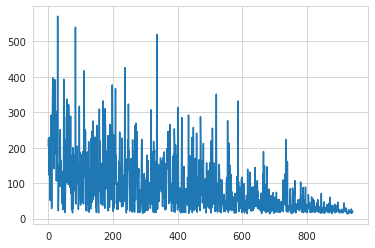

time: 103 ms (started: 2022-11-24 09:05:37 +09:00)


In [72]:
plt.plot(l)
plt.show()

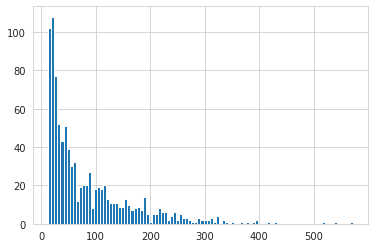

time: 182 ms (started: 2022-11-24 09:05:37 +09:00)


In [73]:
plt.hist(l, bins=100)
plt.show()

time: 184 ms (started: 2022-11-24 09:05:37 +09:00)


# 학습 위한 함수

In [74]:
def build_input_output(train_scores):
    size = len(train_scores)
    ul = np.empty((size, LATENT_SIZE))
    uf = np.empty((size, USER_FEATURE_SIZE))
    cf = np.empty((size, CONTENT_FEATURE_SIZE))
    cl = np.empty((size, LATENT_SIZE))
    s = np.empty((size, SCORE_SIZE))
    for i, score in enumerate(train_scores):
        ul[i] = score.user.latent
        uf[i] = score.user.features
        cf[i] = score.content.features
        cl[i] = score.content.latent
        s[i] = score.values
    return ul, uf, cf, cl, s

time: 550 µs (started: 2022-11-24 09:05:37 +09:00)


In [75]:
LAMDA = 1.0

def build_content_id_2_latent(train_scores, content_latents):
    id_2_latents = {}
    for score in train_scores:
        id_2_latents[score.content.id] = []
    for score, content_latent in zip(train_scores, content_latents):
        id_2_latents[score.content.id].append(content_latent)
    id_2_latent = {}
    for id, latents in id_2_latents.items():
        id_2_latent[id] = np.mean(np.array(latents), axis=0)
    return id_2_latent

def build_user_id_2_latent(train_scores, user_latents):
    id_2_latents = {}
    for score in train_scores:
        id_2_latents[score.user.id] = []
    for score, user_latent in zip(train_scores, user_latents):
        id_2_latents[score.user.id].append(user_latent)
    id_2_latent = {}
    for id, latents in id_2_latents.items():
        id_2_latent[id] = np.mean(np.array(latents), axis=0)
    return id_2_latent

def update_content_latents_by_encoder(encoder, train_scores):
    user_latents, user_features, content_features, _, scores = build_input_output(train_scores)
    content_latents = encoder.predict((user_latents, user_features, content_features, scores), batch_size=BATCH_SIZE)
    id_2_latent = build_content_id_2_latent(train_scores, content_latents)
    for score in train_scores:
        score.content.latent = (1-LAMDA)*score.content.latent + LAMDA*id_2_latent[score.content.id]

def update_user_latents_by_encoder(encoder, train_scores):
    _, user_features, content_features, content_latents, scores = build_input_output(train_scores)
    user_latents = encoder.predict((content_latents, user_features, content_features, scores), batch_size=BATCH_SIZE)
    id_2_latent = build_user_id_2_latent(train_scores, user_latents)
    for score in train_scores:
        score.user.latent = (1-LAMDA)*score.user.latent + LAMDA*id_2_latent[score.user.id]


time: 1.07 ms (started: 2022-11-24 09:05:37 +09:00)


In [76]:
from scipy.stats import gaussian_kde
import seaborn as sns


def update_test_score_latents_with_train_scores(train_scores, test_scores):

    user_id_2_latents = {}
    content_id_2_latents = {}
    for score in train_scores:
        user_id_2_latents[score.user.id] = []
        content_id_2_latents[score.content.id] = []

    for score in train_scores:
        user_id_2_latents[score.user.id].append(score.user.latent)
        content_id_2_latents[score.content.id].append(score.content.latent)

    user_id_2_latent = {}
    content_id_2_latent = {}

    def get_mean_latent(latents):
        return np.mean(np.array(latents), axis=0)

    for id in user_id_2_latents.keys():
        user_id_2_latent[id] = get_mean_latent(user_id_2_latents[id])
    for id in content_id_2_latents.keys():
        content_id_2_latent[id] = get_mean_latent(content_id_2_latents[id])

    for score in test_scores:
        score.user.latent = user_id_2_latent[score.user.id]
        score.content.latent = content_id_2_latent[score.content.id]

time: 991 µs (started: 2022-11-24 09:05:37 +09:00)


In [77]:

def evaluate(train_scores, test_scores):

    ul, uf, cf, cl, true_scores = build_input_output(train_scores)
    predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, cl), batch_size=BATCH_SIZE)
    mse = mean_squared_error((true_scores*SCORE_DIFF+SCORE_MIN), (predicted_scores*SCORE_DIFF+SCORE_MIN))
    train_rmse = round(mse**0.5, 4)


    update_test_score_latents_with_train_scores(train_scores, test_scores)

    ul, uf, cf, cl, true_scores = build_input_output(test_scores)
    predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, cl), batch_size=BATCH_SIZE)
    mse = mean_squared_error((true_scores*SCORE_DIFF+SCORE_MIN), (predicted_scores*SCORE_DIFF+SCORE_MIN))
    test_rmse = round(mse**0.5, 4)  

    return train_rmse, test_rmse

time: 673 µs (started: 2022-11-24 09:05:37 +09:00)


In [78]:
class Logger():
    def __init__(self):
        self.key_2_list = {}

    def _prepare_list(self, key):
        if key not in self.key_2_list.keys():
            self.key_2_list[key] = []

    def append(self, keras_history):
        for key in keras_history.history.keys():
            self._prepare_list(key)
            self.key_2_list[key].append(keras_history.history[key][-1])

    def __getitem__(self, key):
        return self.key_2_list[key]


time: 500 µs (started: 2022-11-24 09:05:37 +09:00)


In [79]:
def update_score_latent_with_encoders(uie, cie, iter_count, train_scores):
    for i in range(iter_count):
        ul, uf, cf, cl, s = build_input_output(train_scores)
        predicted_cl = uie.predict((ul, uf, cf, s), batch_size=BATCH_SIZE)
        predicted_ul = cie.predict((cl, uf, cf, s), batch_size=BATCH_SIZE)

        for score, ul, cl in zip(train_scores, predicted_ul, predicted_cl):
            score.user.latent = ul
            score.content.latent = cl


time: 435 µs (started: 2022-11-24 09:05:37 +09:00)


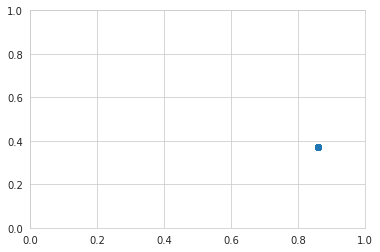

time: 120 ms (started: 2022-11-24 09:05:37 +09:00)


In [80]:
sample_user_id = 1
scores_of_sample_user = [score for score in train_scores if score.user.id==sample_user_id]

def draw_user_latent_distribution(scores):
    sample_user_latents = np.array([score.user.latent for score in scores])
    plt.scatter(sample_user_latents[:,0], sample_user_latents[:,1])
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()
draw_user_latent_distribution(scores_of_sample_user)    

# 학습 실행

time: 123 ms (started: 2022-11-24 09:05:37 +09:00)


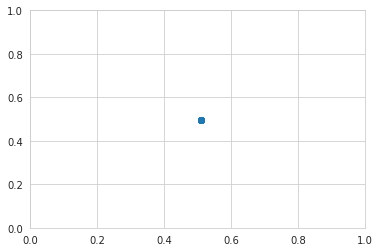

0/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9309, test_rmse=0.9631, diff=0.0322


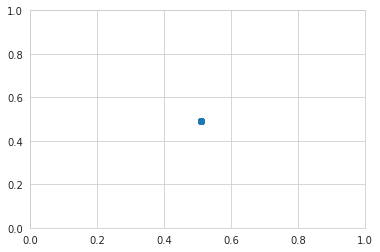

1/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9197, test_rmse=0.9516, diff=0.0319


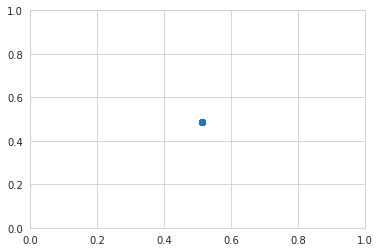

2/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9257, test_rmse=0.9588, diff=0.0331


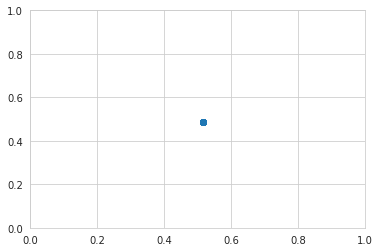

3/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9256, test_rmse=0.9593, diff=0.0337


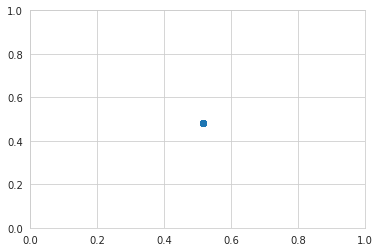

4/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9234, test_rmse=0.9575, diff=0.0341


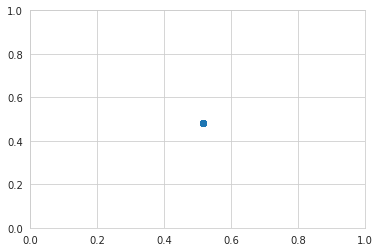

5/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9189, test_rmse=0.9534, diff=0.0345


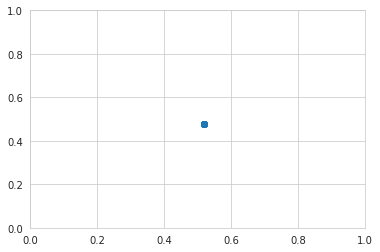

6/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9151, test_rmse=0.9492, diff=0.0341


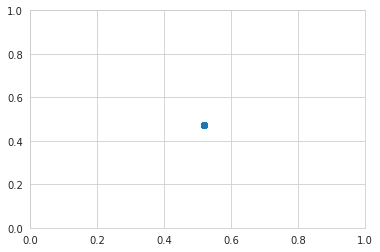

7/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9148, test_rmse=0.95, diff=0.0352


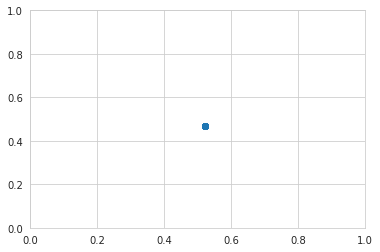

8/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9143, test_rmse=0.9496, diff=0.0353


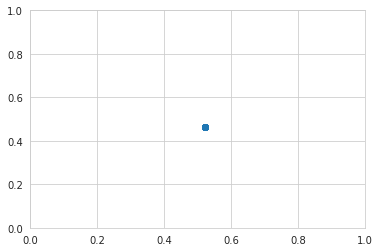

9/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9142, test_rmse=0.9498, diff=0.0356


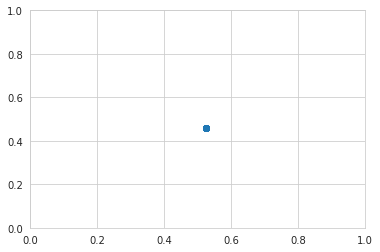

10/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9167, test_rmse=0.9529, diff=0.0362


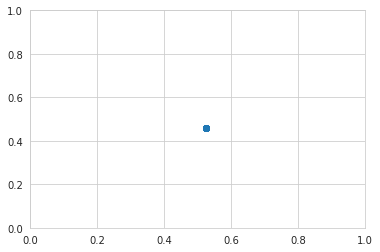

11/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9149, test_rmse=0.9513, diff=0.0364


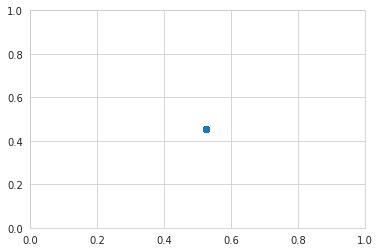

12/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9137, test_rmse=0.9501, diff=0.0364


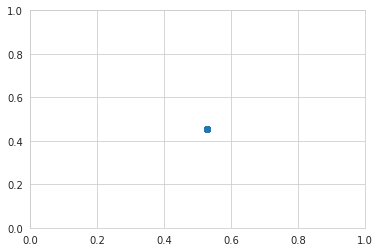

13/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.928, test_rmse=0.9649, diff=0.0369


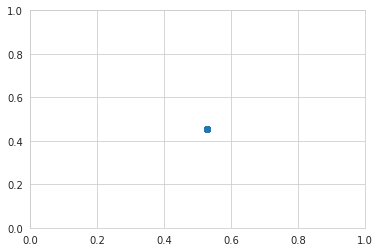

14/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9179, test_rmse=0.9548, diff=0.0369


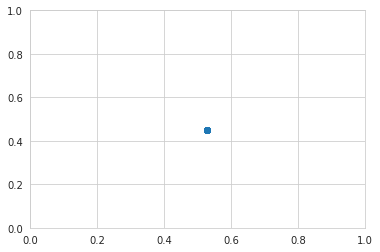

15/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9193, test_rmse=0.9567, diff=0.0374


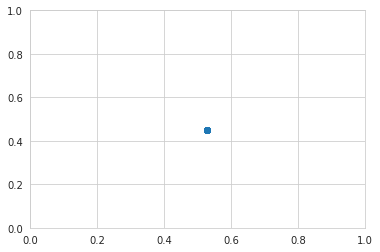

16/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9127, test_rmse=0.9501, diff=0.0374


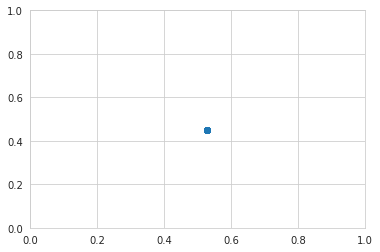

17/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.912, test_rmse=0.9494, diff=0.0374


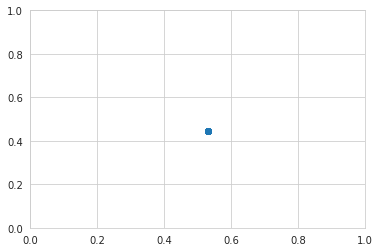

18/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9131, test_rmse=0.9508, diff=0.0377


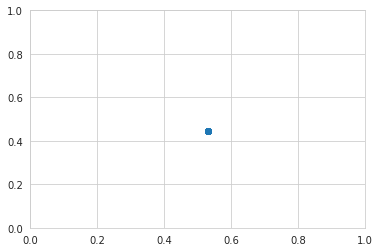

19/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.927, test_rmse=0.9648, diff=0.0378


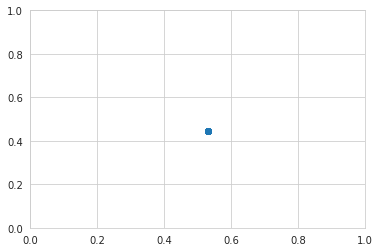

20/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9325, test_rmse=0.9702, diff=0.0377


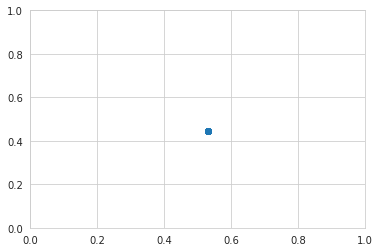

21/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9119, test_rmse=0.9495, diff=0.0376


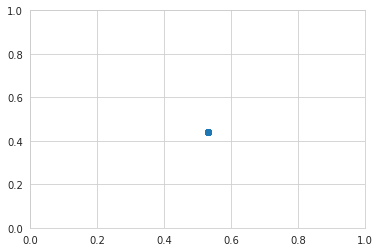

22/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.912, test_rmse=0.9496, diff=0.0376


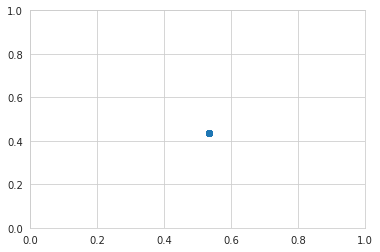

23/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9127, test_rmse=0.9509, diff=0.0382


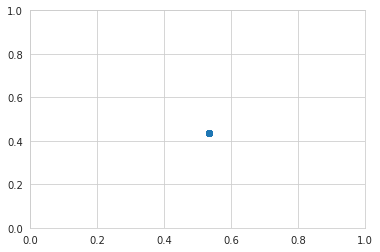

24/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9181, test_rmse=0.9565, diff=0.0384


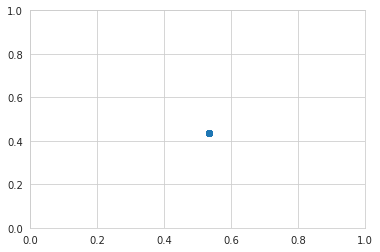

25/64
78/78 [==============================] - 0s 996us/step
train_rmse=0.9119, test_rmse=0.9497, diff=0.0378


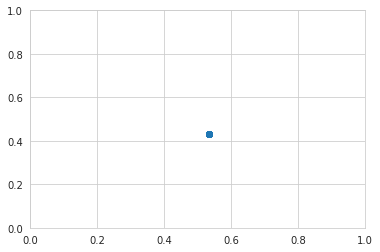

26/64
78/78 [==============================] - 0s 982us/step
train_rmse=0.9156, test_rmse=0.9539, diff=0.0383


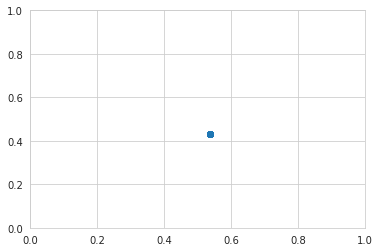

27/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9143, test_rmse=0.9526, diff=0.0383


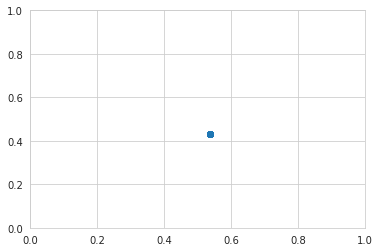

28/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9198, test_rmse=0.9581, diff=0.0383


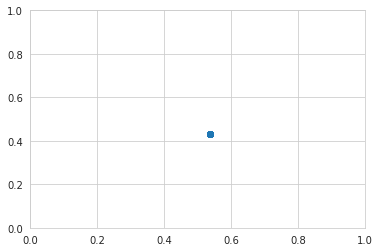

29/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9114, test_rmse=0.9497, diff=0.0383


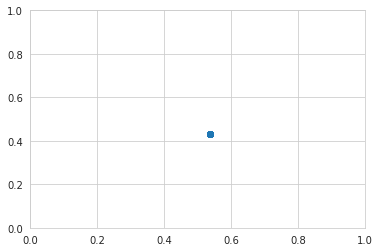

30/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9246, test_rmse=0.9631, diff=0.0385


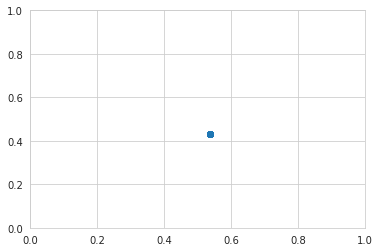

31/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9168, test_rmse=0.9552, diff=0.0384


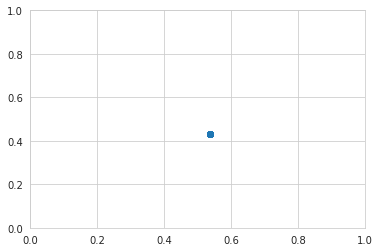

32/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9132, test_rmse=0.9512, diff=0.038


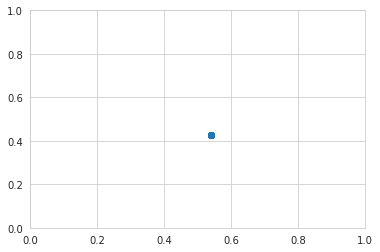

33/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9195, test_rmse=0.9579, diff=0.0384


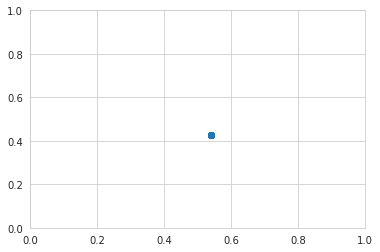

34/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9123, test_rmse=0.95, diff=0.0377


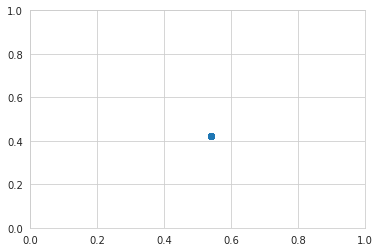

35/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9193, test_rmse=0.9576, diff=0.0383


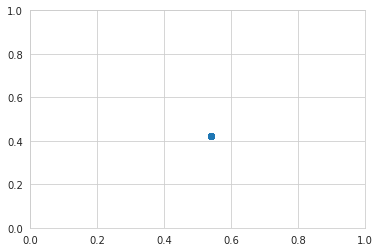

36/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.911, test_rmse=0.9489, diff=0.0379


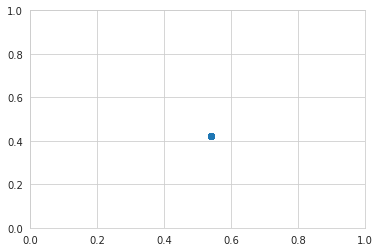

37/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.911, test_rmse=0.9493, diff=0.0383


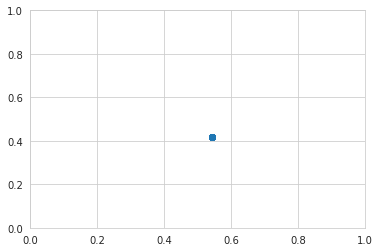

38/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9117, test_rmse=0.95, diff=0.0383


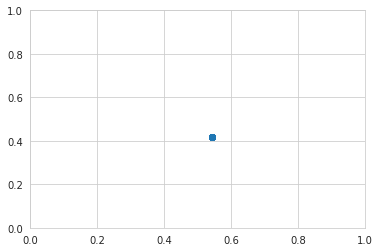

39/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9132, test_rmse=0.9515, diff=0.0383


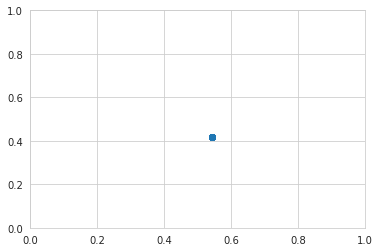

40/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9112, test_rmse=0.9492, diff=0.038


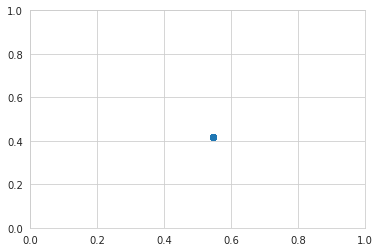

41/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9112, test_rmse=0.9494, diff=0.0382


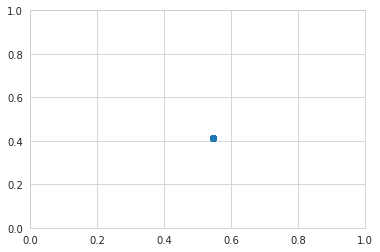

42/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9231, test_rmse=0.9612, diff=0.0381


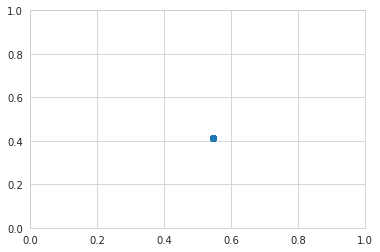

43/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.912, test_rmse=0.95, diff=0.038


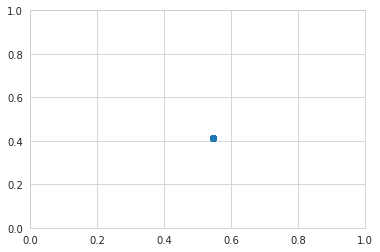

44/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9107, test_rmse=0.9488, diff=0.0381


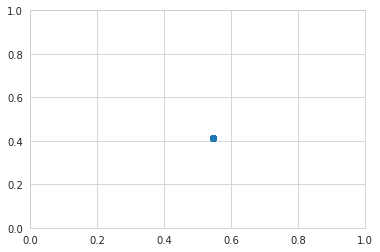

45/64
78/78 [==============================] - 0s 943us/step
train_rmse=0.9137, test_rmse=0.9522, diff=0.0385


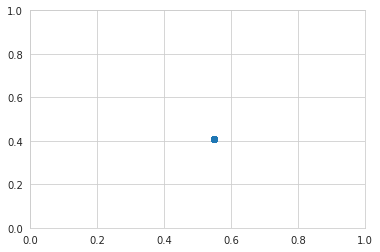

46/64
78/78 [==============================] - 0s 923us/step
train_rmse=0.9108, test_rmse=0.9489, diff=0.0381


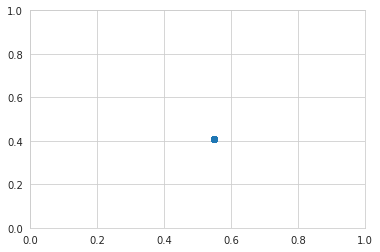

47/64
78/78 [==============================] - 0s 899us/step
train_rmse=0.9109, test_rmse=0.9489, diff=0.038


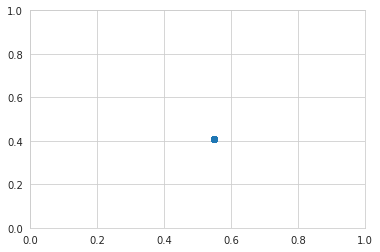

48/64
78/78 [==============================] - 0s 2ms/step
train_rmse=0.9106, test_rmse=0.9486, diff=0.038


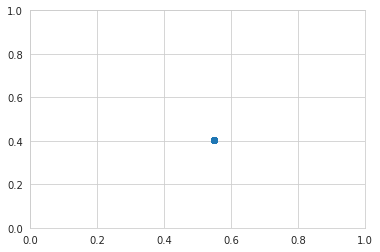

49/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9114, test_rmse=0.9494, diff=0.038


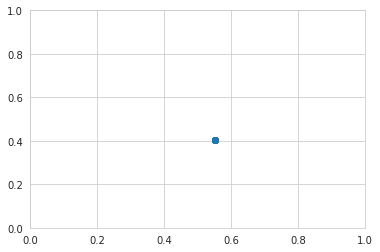

50/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9109, test_rmse=0.9489, diff=0.038


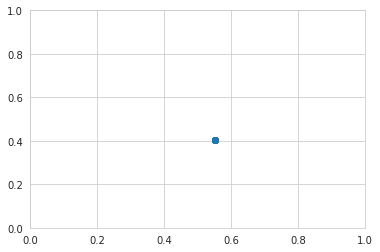

51/64
78/78 [==============================] - 0s 2ms/step
train_rmse=0.9154, test_rmse=0.9534, diff=0.038


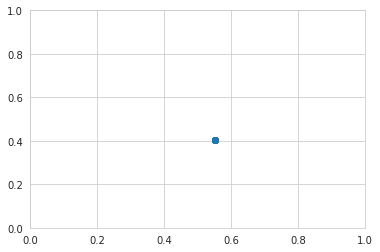

52/64
78/78 [==============================] - 0s 918us/step
train_rmse=0.9253, test_rmse=0.9637, diff=0.0384


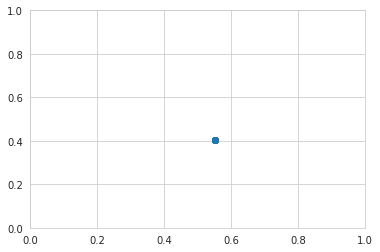

53/64
78/78 [==============================] - 0s 971us/step
train_rmse=0.926, test_rmse=0.964, diff=0.038


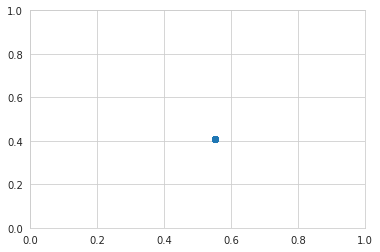

54/64
78/78 [==============================] - 0s 893us/step
train_rmse=0.9167, test_rmse=0.9548, diff=0.0381


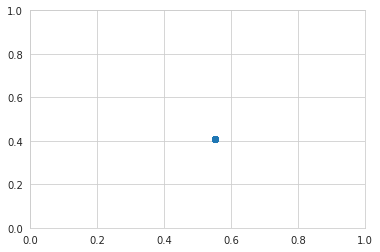

55/64
78/78 [==============================] - 0s 938us/step
train_rmse=0.9223, test_rmse=0.9603, diff=0.038


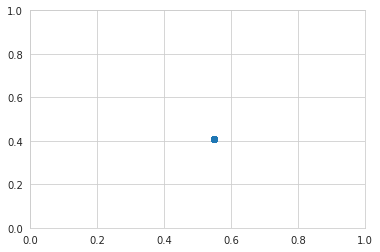

56/64
78/78 [==============================] - 0s 919us/step
train_rmse=0.9104, test_rmse=0.9483, diff=0.0379


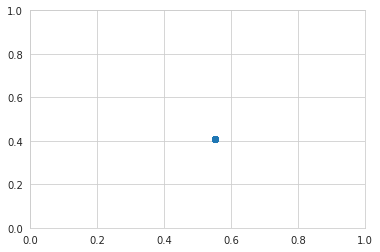

57/64
78/78 [==============================] - 0s 924us/step
train_rmse=0.9233, test_rmse=0.9613, diff=0.038


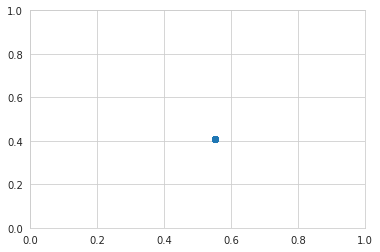

58/64
78/78 [==============================] - 0s 937us/step
train_rmse=0.9259, test_rmse=0.9638, diff=0.0379


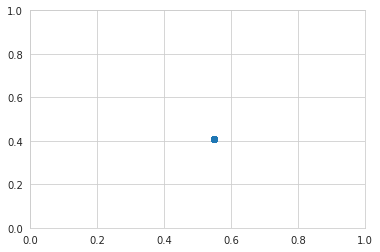

59/64
78/78 [==============================] - 0s 918us/step
train_rmse=0.9222, test_rmse=0.96, diff=0.0378


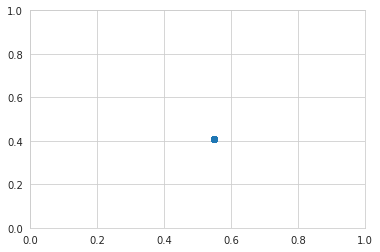

60/64
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9182, test_rmse=0.9562, diff=0.038


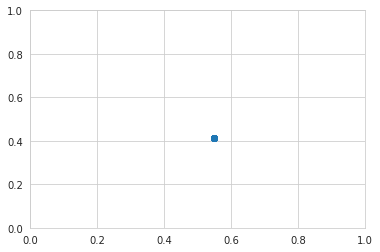

61/64
78/78 [==============================] - 0s 926us/step
train_rmse=0.9121, test_rmse=0.9503, diff=0.0382


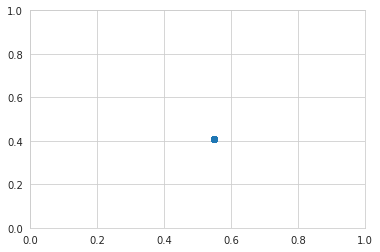

62/64
78/78 [==============================] - 0s 931us/step
train_rmse=0.9103, test_rmse=0.9481, diff=0.0378


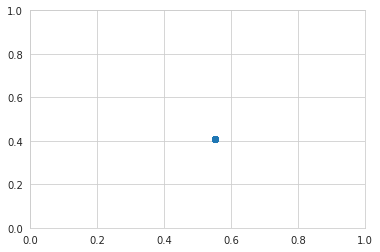

63/64
78/78 [==============================] - 0s 946us/step
train_rmse=0.9238, test_rmse=0.962, diff=0.0382


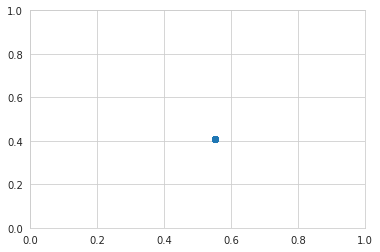

time: 6min 19s (started: 2022-11-24 09:07:27 +09:00)


In [113]:
EPOCH = 64


user_input_autoencoder.encoder.trainable = True
user_input_autoencoder.decoder.trainable = True
content_input_autoencoder.encoder.trainable = True
content_input_autoencoder.decoder.trainable = True


train_rmses = []
test_rmses = []
logger1 = Logger()
logger2 = Logger()

draw_user_latent_distribution(scores_of_sample_user)    
for epoch in range(EPOCH):
    print(f"{epoch}/{EPOCH}")
    np.random.shuffle(train_scores)

    ul, uf, cf, cl, s = build_input_output(train_scores)
    autoencoder1_hist = user_input_autoencoder.fit((ul, uf, cf, s), (cl, s),
        epochs=1, batch_size=BATCH_SIZE, validation_split=0.1)        
    update_content_latents_by_encoder(user_input_autoencoder.encoder, train_scores)

    ul, uf, cf, cl, s = build_input_output(train_scores)
    autoencoder2_hist = content_input_autoencoder.fit((cl, uf, cf, s), (ul, s),
        epochs=1, batch_size=BATCH_SIZE, validation_split=0.1)
    update_user_latents_by_encoder(content_input_autoencoder.encoder, train_scores)


    train_rmse, test_rmse = evaluate(train_scores, test_scores)
    print(f"train_rmse={train_rmse}, test_rmse={test_rmse}, diff={round(test_rmse-train_rmse,5)}")
    draw_user_latent_distribution(scores_of_sample_user)    

    logger1.append(autoencoder1_hist)
    logger2.append(autoencoder2_hist)

    train_rmses.append(train_rmse)
    test_rmses.append(test_rmse)


In [82]:
def show_total_loss(logger1, logger2):

    print("total loss")

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(logger1['loss'])

    plt.subplot(1,2,2)
    plt.plot(logger2['loss'])

    plt.show()

    print(round(logger1['loss'][-1],5), round(logger2['loss'][-1],5))
    print()

def show_latent_loss(logger1, logger2):

    print("latent loss")

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(logger1['UIAE.E_loss'])

    plt.subplot(1,2,2)
    plt.plot(logger2['CIAE.E_loss'])

    plt.show()

    print(round(logger1['UIAE.E_loss'][-1],5), round(logger2['CIAE.E_loss'][-1],5))
    print()


def show_score_loss(logger1, logger2):

    print("score loss")

    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(logger1['D_loss'])

    plt.subplot(1,2,2)
    plt.plot(logger2['D_loss'])

    plt.show()

    print(round(logger1['D_loss'][-1],5), round(logger2['D_loss'][-1],5))
    print()

def show_rmse(train_rmses, test_rmses):

    print("RMSE")
    plt.plot(train_rmses, label="train rmse")
    plt.plot(test_rmses, label="test rmse")
    plt.legend()
    plt.show()

    print(f"train_rmse={round(train_rmses[-1],5)}, test_rmse={round(test_rmses[-1],5)}")
    print()

def show_loss(logger1, logger2, train_rmses, test_rmses):

    show_total_loss(logger1, logger2)
    show_latent_loss(logger1, logger2)
    show_score_loss(logger1, logger2)
    show_rmse(train_rmses, test_rmses)

time: 1.85 ms (started: 2022-11-24 09:06:50 +09:00)


total loss


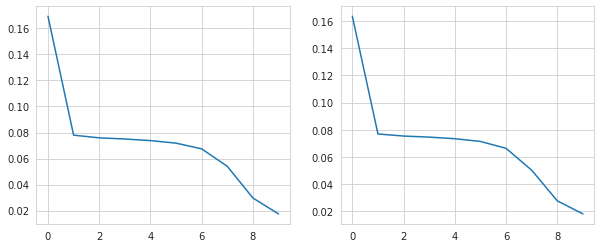

0.01749 0.01809

latent loss


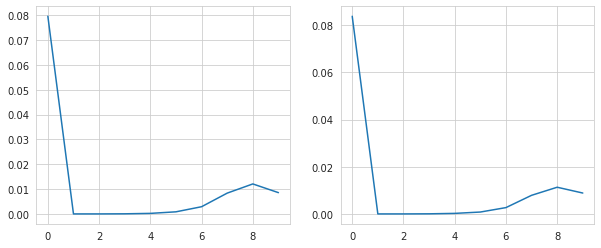

0.00857 0.00885

score loss


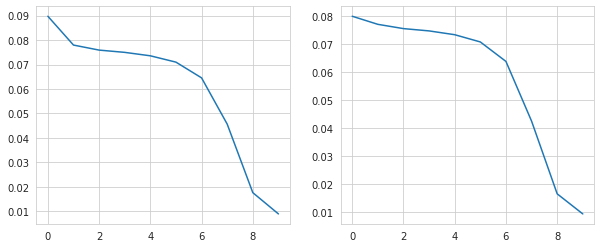

0.00892 0.00924

RMSE


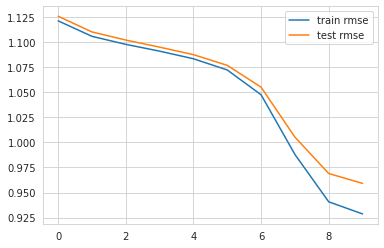

train_rmse=0.9286, test_rmse=0.9591

time: 661 ms (started: 2022-11-24 09:06:50 +09:00)


In [83]:
show_loss(logger1, logger2, train_rmses, test_rmses)

# 학습 결과 살펴보기

## AE의 입력으로 구한 score

In [84]:
ul, uf, cf, cl, s = build_input_output(train_scores)
predicted_latents, predicted_scores = user_input_autoencoder.predict((ul, uf, cf, s), batch_size=BATCH_SIZE)        

mse = mean_squared_error(s, predicted_scores)
print(mse)

313/313 [==============================] - 1s 1ms/step
0.008600686126860583
time: 930 ms (started: 2022-11-24 09:06:51 +09:00)


## encoder의 출력을 decoder 입력으로 구한 score

In [85]:
predicted_cl = user_input_autoencoder.encoder.predict((ul, uf, cf, s), batch_size=BATCH_SIZE)
predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, predicted_cl), batch_size=BATCH_SIZE)

mse = mean_squared_error(s, predicted_scores)
print(mse)

313/313 [==============================] - 0s 947us/step
0.008600686126860583
time: 846 ms (started: 2022-11-24 09:06:52 +09:00)


## train data로 직접 decoder로 구한 score

In [86]:
predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, cl), batch_size=BATCH_SIZE)

mse = mean_squared_error(s, predicted_scores)
print(mse)

313/313 [==============================] - 0s 916us/step
0.053891657283099095
time: 412 ms (started: 2022-11-24 09:06:53 +09:00)


## train data 담긴 한 유저의 latent

In [87]:
scores_of_user_id_1 = user_id_2_scores[1]
print(np.array([ score.user.latent for score in scores_of_user_id_1])[:5])

[[0.5094319  0.49423301]
 [0.5094319  0.49423301]
 [0.5094319  0.49423301]
 [0.5094319  0.49423301]
 [0.5094319  0.49423301]]
time: 1.06 ms (started: 2022-11-24 09:06:53 +09:00)


## encoder로 구한 한 유저의 latent

In [88]:
ul, uf, cf, cl, s = build_input_output(scores_of_user_id_1)
predicted_user_latents = content_input_autoencoder.encoder.predict((cl, uf, cf, s), batch_size=BATCH_SIZE)

print(predicted_user_latents[:5])

1/1 [==============================] - 0s 17ms/step
[[0.47995085 0.62980366]
 [0.549943   0.32684538]
 [0.5364287  0.38699034]
 [0.55331224 0.33638847]
 [0.5314165  0.40419427]]
time: 46.2 ms (started: 2022-11-24 09:06:53 +09:00)


In [89]:
print(np.std(predicted_user_latents, axis=0))

[0.03324326 0.13952753]
time: 580 µs (started: 2022-11-24 09:06:53 +09:00)


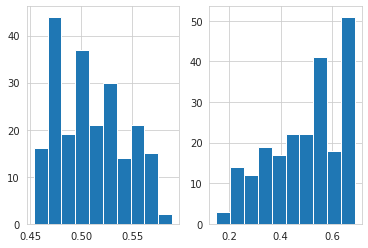

latent variation width : [0.13579232 0.53930306]
time: 154 ms (started: 2022-11-24 09:06:53 +09:00)


In [90]:
plt.subplot(1,2,1)
plt.hist(predicted_user_latents[:,0])
plt.subplot(1,2,2)
plt.hist(predicted_user_latents[:,1])
plt.show()
print("latent variation width :", np.max(predicted_user_latents, axis=0)-np.min(predicted_user_latents, axis=0))

time: 157 ms (started: 2022-11-24 09:06:53 +09:00)


In [91]:
from sklearn.metrics import mean_squared_error

SCORE_NAMES = ["rating", "dummy1", "dummy2", "dummy3", "dummy4"]
def show_regression_result(train_or_test, true_scores, predicted_scores):

    print(f"{train_or_test} Data")
    print("true_score : predicted_score")
    plt.figure(figsize=(SCORE_SIZE*4, 3))
    for i in range(SCORE_SIZE):
        plt.subplot(1,SCORE_SIZE,i+1)
        plt.scatter(true_scores[:,i], predicted_scores[:,i], marker='.')
        plt.xlim((0.0, 1.0))
        plt.ylim((0.0, 1.0))
        plt.title(f'{SCORE_NAMES[i]}')
        plt.xlabel('truth')
        plt.ylabel('predicted')
    plt.show()

    # mse = mean_squared_error(true_scores, predicted_scores)
    # print("mse :",mse)
    # rmse = mse**0.5
    # print("rmse :",rmse)

    mse = mean_squared_error((true_scores*SCORE_DIFF+SCORE_MIN), (predicted_scores*SCORE_DIFF+SCORE_MIN))
    # print("mse :",mse)
    rmse = mse**0.5
    print("rmse :",rmse)


time: 695 µs (started: 2022-11-24 09:06:53 +09:00)


In [92]:
ul, uf, cf, cl, s = build_input_output(train_scores)
predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, cl), batch_size=BATCH_SIZE)

313/313 [==============================] - 0s 916us/step
time: 608 ms (started: 2022-11-24 09:06:53 +09:00)


Train Data
true_score : predicted_score


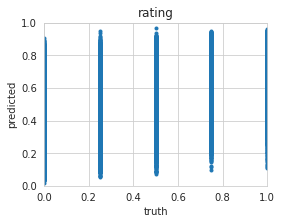

rmse : 0.9285830688174869
time: 132 ms (started: 2022-11-24 09:06:54 +09:00)


In [93]:
show_regression_result("Train", s, predicted_scores)

time: 135 ms (started: 2022-11-24 09:06:54 +09:00)


In [94]:
update_test_score_latents_with_train_scores(train_scores, test_scores)
ul, uf, cf, cl, s = build_input_output(test_scores)
predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, cl), batch_size=BATCH_SIZE)


78/78 [==============================] - 0s 951us/step
time: 372 ms (started: 2022-11-24 09:06:54 +09:00)


Test Data
true_score : predicted_score


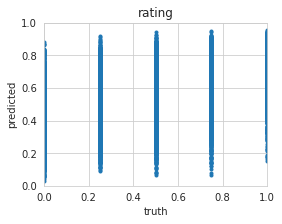

rmse : 0.9590660418084165
time: 94.1 ms (started: 2022-11-24 09:06:54 +09:00)


In [95]:
show_regression_result("Test", s, predicted_scores)

time: 96.5 ms (started: 2022-11-24 09:06:54 +09:00)


time: 98.7 ms (started: 2022-11-24 09:06:54 +09:00)


time: 101 ms (started: 2022-11-24 09:06:54 +09:00)


time: 103 ms (started: 2022-11-24 09:06:54 +09:00)


# Decoder 추가 학습

# 학습 실행

In [96]:
EPOCH = 10

from tensorflow.keras.optimizers import Adam, RMSprop
decoder_optimizer = RMSprop(learning_rate=0.001*0.1)
user_input_autoencoder.decoder.compile(loss="mse", optimizer=decoder_optimizer)


train_rmses = []
test_rmses = []
logger1 = Logger()
logger2 = Logger()

ul, uf, cf, cl, s = build_input_output(train_scores)

for epoch in range(EPOCH):
    print(f"{epoch}/{EPOCH}")

    autoencoder1_hist = user_input_autoencoder.decoder.fit((ul, uf, cf, cl), s,
        epochs=1, batch_size=BATCH_SIZE, validation_split=0.1)        

    train_rmse, test_rmse = evaluate(train_scores, test_scores)
    print(f"train_rmse={train_rmse}, test_rmse={test_rmse}, diff={round(test_rmse-train_rmse,5)}")

    train_rmses.append(train_rmse)
    test_rmses.append(test_rmse)


0/10
78/78 [==============================] - 0s 976us/step
train_rmse=0.9273, test_rmse=0.9576, diff=0.0303
1/10
78/78 [==============================] - 0s 981us/step
train_rmse=0.9236, test_rmse=0.955, diff=0.0314
2/10
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9233, test_rmse=0.9542, diff=0.0309
3/10
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9256, test_rmse=0.9578, diff=0.0322
4/10
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9222, test_rmse=0.954, diff=0.0318
5/10
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9212, test_rmse=0.953, diff=0.0318
6/10
78/78 [==============================] - 0s 1ms/step
train_rmse=0.922, test_rmse=0.9539, diff=0.0319
7/10
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9209, test_rmse=0.9529, diff=0.032
8/10
78/78 [==============================] - 0s 1ms/step
train_rmse=0.9227, test_rmse=0.9538, diff=0.0311
9/10
78/78 [==========================

RMSE


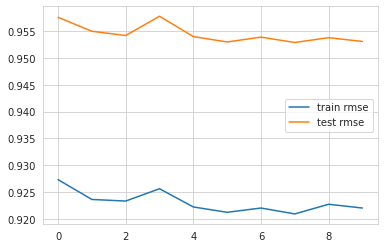

train_rmse=0.922, test_rmse=0.9531

time: 101 ms (started: 2022-11-24 09:07:13 +09:00)


In [97]:
show_rmse(train_rmses, test_rmses)

# 학습 결과 살펴보기

## AE의 입력으로 구한 score

In [98]:
ul, uf, cf, cl, s = build_input_output(train_scores)
predicted_latents, predicted_scores = user_input_autoencoder.predict((ul, uf, cf, s), batch_size=BATCH_SIZE)        

mse = mean_squared_error(s, predicted_scores)
print(mse)

313/313 [==============================] - 0s 1ms/step
0.009187469549985474
time: 768 ms (started: 2022-11-24 09:07:13 +09:00)


## encoder의 출력을 decoder 입력으로 구한 score

In [99]:
predicted_cl = user_input_autoencoder.encoder.predict((ul, uf, cf, s), batch_size=BATCH_SIZE)
predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, predicted_cl), batch_size=BATCH_SIZE)

mse = mean_squared_error(s, predicted_scores)
print(mse)

313/313 [==============================] - 0s 850us/step
0.009187469549985474
time: 810 ms (started: 2022-11-24 09:07:14 +09:00)


## train data로 직접 decoder로 구한 score

In [100]:
predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, cl), batch_size=BATCH_SIZE)

mse = mean_squared_error(s, predicted_scores)
print(mse)

313/313 [==============================] - 0s 938us/step
0.05312865865006628
time: 417 ms (started: 2022-11-24 09:07:15 +09:00)


## train data 담긴 한 유저의 latent

In [101]:
scores_of_user_id_1 = user_id_2_scores[1]
print(np.array([ score.user.latent for score in scores_of_user_id_1])[:5])

[[0.5094319  0.49423301]
 [0.5094319  0.49423301]
 [0.5094319  0.49423301]
 [0.5094319  0.49423301]
 [0.5094319  0.49423301]]
time: 1.17 ms (started: 2022-11-24 09:07:15 +09:00)


## encoder로 구한 한 유저의 latent

In [102]:
ul, uf, cf, cl, s = build_input_output(scores_of_user_id_1)
predicted_user_latents = content_input_autoencoder.encoder.predict((cl, uf, cf, s), batch_size=BATCH_SIZE)

print(predicted_user_latents[:5])

1/1 [==============================] - 0s 18ms/step
[[0.47995085 0.62980366]
 [0.549943   0.32684538]
 [0.5364287  0.38699034]
 [0.55331224 0.33638847]
 [0.5314165  0.40419427]]
time: 45.4 ms (started: 2022-11-24 09:07:15 +09:00)


In [103]:
print(np.std(predicted_user_latents, axis=0))

[0.03324326 0.13952753]
time: 558 µs (started: 2022-11-24 09:07:16 +09:00)


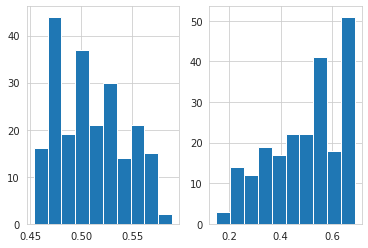

latent variation width : [0.13579232 0.53930306]
time: 151 ms (started: 2022-11-24 09:07:16 +09:00)


In [104]:
plt.subplot(1,2,1)
plt.hist(predicted_user_latents[:,0])
plt.subplot(1,2,2)
plt.hist(predicted_user_latents[:,1])
plt.show()
print("latent variation width :", np.max(predicted_user_latents, axis=0)-np.min(predicted_user_latents, axis=0))

In [105]:
ul, uf, cf, cl, s = build_input_output(train_scores)
predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, cl))

2500/2500 [==============================] - 3s 1ms/step
time: 3.96 s (started: 2022-11-24 09:07:16 +09:00)


Train Data
true_score : predicted_score


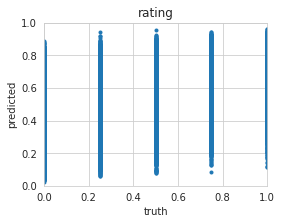

rmse : 0.9219861920438857
time: 139 ms (started: 2022-11-24 09:07:20 +09:00)


In [106]:
show_regression_result("Train", s, predicted_scores)

In [107]:
update_test_score_latents_with_train_scores(train_scores, test_scores)
ul, uf, cf, cl, s = build_input_output(test_scores)
predicted_scores = user_input_autoencoder.decoder.predict((ul, uf, cf, cl))


624/624 [==============================] - 1s 1ms/step
time: 1.16 s (started: 2022-11-24 09:07:20 +09:00)


Test Data
true_score : predicted_score


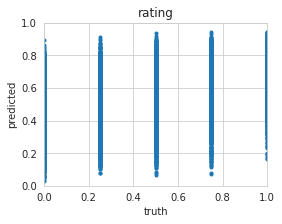

rmse : 0.9531370699353064
time: 94.1 ms (started: 2022-11-24 09:07:21 +09:00)


In [108]:
show_regression_result("Test", s, predicted_scores)

time: 96.3 ms (started: 2022-11-24 09:07:21 +09:00)


time: 98.4 ms (started: 2022-11-24 09:07:21 +09:00)


time: 100 ms (started: 2022-11-24 09:07:21 +09:00)


time: 102 ms (started: 2022-11-24 09:07:21 +09:00)


time: 104 ms (started: 2022-11-24 09:07:21 +09:00)


# 좀 살펴보기

In [109]:
target_index = -1
for i in range(1000):
    if s[i]==0.5:
        target_index = i
        break
print(target_index)
print(s[target_index])

0
[0.5]
time: 500 µs (started: 2022-11-24 09:07:21 +09:00)


target_index=1
[0.5]
40/40 [==============================] - 0s 1ms/step
predicted score


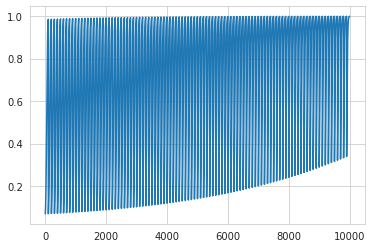


diff


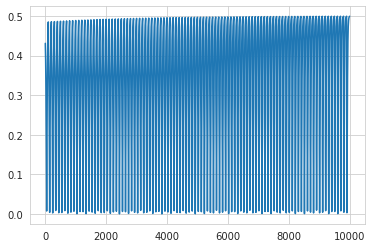


diff heatmap


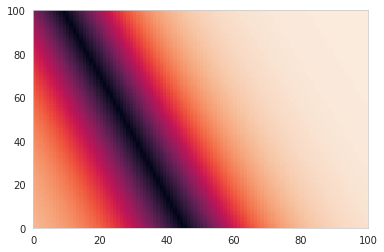

time: 607 ms (started: 2022-11-24 09:07:21 +09:00)


In [110]:
user_latents, user_features, content_features, content_latents, scores = build_input_output(train_scores)

target_index = -1
for i in range(1000):
    if scores[i][0]==0.5:
        target_index = i
        break
print(f"target_index={target_index}")
print(scores[target_index])


ul = np.empty((100*100, LATENT_SIZE))
uf = np.empty((100*100, USER_FEATURE_SIZE))
cf = np.empty((100*100, CONTENT_FEATURE_SIZE))
cl = np.empty((100*100, LATENT_SIZE))

for i in range(100):
    for j in range(100):
        ul[i*100+j] = user_latents[target_index]
        uf[i*100+j] = user_features[target_index]
        cf[i*100+j] = content_features[target_index]
        cl[i*100+j] = np.array([i*0.01,j*0.01])

ps = user_input_autoencoder.decoder.predict((ul, uf, cf, cl), batch_size=BATCH_SIZE)
print("predicted score")
plt.plot(ps)
plt.show()
print()

ps = np.abs(ps - s[target_index])
print("diff")
plt.plot(ps)
plt.show()
print()

hm = ps.reshape((100,100))
print("diff heatmap")
plt.pcolor(hm)
plt.show()

target_user_id=705
89


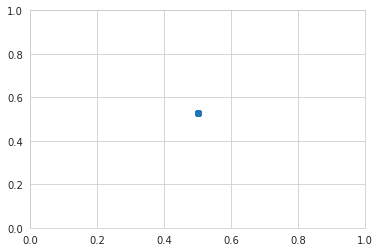

time: 107 ms (started: 2022-11-24 09:07:22 +09:00)


In [111]:
target_user_id = train_scores[target_index].user.id
print(f"target_user_id={target_user_id}")

scores_of_target_user_id = [score for score in train_scores if score.user.id==target_user_id]
print(len(scores_of_target_user_id))

uls = np.array([score.user.latent for score in scores_of_target_user_id])
plt.scatter(uls[:,0], uls[:,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()


0.5 스코어를 보인 특정 user가 포함된 score들에 대한 decoder의 예측값 분포


In [112]:
target_user_id = train_scores[target_index].user.id
print(f"target_user_id={target_user_id}")

scores_of_target_user_id = [score for score in train_scores if score.user.id==target_user_id]
print(len(scores_of_target_user_id))

cls = np.array([score.content.latent for score in scores_of_target_user_id])

plt.scatter(cls[:,0], cls[:,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

ul = np.empty((len(scores_of_target_user_id), LATENT_SIZE))
uf = np.empty((len(scores_of_target_user_id), USER_FEATURE_SIZE))
cf = np.empty((len(scores_of_target_user_id), CONTENT_FEATURE_SIZE))
cl = np.empty((len(scores_of_target_user_id), LATENT_SIZE))
s = np.empty((len(scores_of_target_user_id), SCORE_SIZE))

first_ul = scores_of_target_user_id[0].user.latent
for i, score in enumerate(scores_of_target_user_id):
    ul[i] = first_ul # 0.5 스코어가 나온 ul로 고정
    uf[i] = score.user.features
    cf[i] = score.content.features
    cl[i] = score.content.latent
    s[i] = score.values

ps = decoder.predict((ul, uf, cf, cl))
ts = np.full_like(ps, 0.5)
mse = mean_squared_error((ts*SCORE_DIFF+SCORE_MIN), (ps*SCORE_DIFF+SCORE_MIN))
rmse = round(mse**0.5, 4)  
print(f"rmse={rmse}")
plt.hist(ps, bins=100)
plt.show()

plt.hist(s, bins=100)
plt.show()

plt.scatter(s, ps-)
plt.show()


ps = np.abs(ps-0.5)

print(np.mean(ps))

hm = np.zeros((100,100))
for i, score in enumerate(scores_of_target_user_id):
    y, x = (score.content.latent*100).astype(int)
    hm[x,y] = ps[i]

plt.pcolor(hm)
plt.colorbar()
plt.show()

SyntaxError: invalid syntax (1730583908.py, line 39)

time: 1.26 ms (started: 2022-11-24 09:07:22 +09:00)


In [ ]:
s = [score.values[0] for score in scores_of_target_user_id]
plt.hist(s, bins=100)
plt.show()
print(len(s))

같은 user id의 user latent 분포

In [ ]:
plt.figure(figsize=(15,15))
for target_user_id in range(1,1+100):
    same_user_id_scores = [score for score in train_scores if score.user.id==target_user_id]
    uls = np.array([score.user.latent for score in same_user_id_scores])
    plt.subplot(10,10,target_user_id)
    plt.scatter(uls[:,0], uls[:,1])
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.axis('off')

plt.show()

같은 content id의 content latent 분포

In [ ]:
plt.figure(figsize=(15,15))
for target_content_id in range(1,1+100):
    same_content_id_scores = [score for score in train_scores if score.content.id==target_content_id]
    cls = np.array([score.content.latent for score in same_content_id_scores])
    plt.subplot(10,10,target_content_id)
    plt.scatter(cls[:,0], cls[:,1])
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.axis('off')

plt.show()

특정 score의 user latent, content latent값들을 보자

In [ ]:
filtered_scores = np.array([score for score in train_scores if score.values==[0.5]])
print(filtered_scores.shape)
ul = np.array([score.user.latent for score in filtered_scores])
cl = np.array([score.content.latent for score in filtered_scores])
plt.scatter(ul[:,0], ul[:,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

plt.scatter(cl[:,0], cl[:,1])
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()


In [ ]:
plt.figure(figsize=(15,6))
for i in range(5):
    filtered_scores = np.array([score for score in train_scores if score.values==[i/4]])
    ul = np.array([score.user.latent for score in filtered_scores])
    cl = np.array([score.content.latent for score in filtered_scores])
    plt.subplot(2,5,i+1)
    plt.scatter(ul[:,0], ul[:,1])
    plt.xlim(0,1)
    plt.ylim(0,1)

    plt.subplot(2,5,5+i+1)
    plt.scatter(cl[:,0], cl[:,1])
    plt.xlim(0,1)
    plt.ylim(0,1)
plt.show()
